### 웹 스크래핑
- 특정 웹 페이지에서 필요한 정보를 추출하는 프로세스
     - ex. 웹페이지에서 제품의 가격, 리뷰, 이미지, 링크 등의 정보를 수집하는 행위

In [1]:
# 필요한 도구 불러오기

import requests as req
# HTTP 통신 규약, 통신 규칙, 통신 체계
# HTTP형식으로 '요청'을 보내고, '응답'받을 때 사용되는 라이브러리

### 스크래핑 단계
1. 요청
2. 파싱 -> 요소를 지정할 수 있도록, 컴퓨터에게 html 코드를 인식시키는 과정
3. 지정, 추출
4. 저장

### 1. 요청

In [11]:
# 요청할 페이지의 url
url = "https://news.naver.com/"

# url 가지고, Naver news에 ****'요청'***** 보내기
res = req.get(url)
res
# get방식   공개적인 방식, post방식은 숨겨서보내는 방식

#응답 상태를 200으로 나타내 준다.
# 404 클라이언트 오류

# 200번대: 통신에 성공 -> '요청'을 보낸것. 서빙을 한다. 
# 400번대: 클라이언트 잘못 -> CT(클라이언트, 사용자)측의 잘못이거나, 만료된 페이지
# 500번대: 서버 잘못 -> 서버가 다운되어 있거나, 서버측에서 응답이 제대로 이루어지지  못 하는 상황일 때

<Response [200]>

HTTP 상태를 확인할 수 있는 사이트 :  https://developer.mozilla.org/ko/docs/Web/HTTP/Status 

In [10]:
req.get("https://news.naver.com/ddd") # 일부러 틀려보기!

<Response [404]>

### 2. 파싱
- 응답받는 정보에서 요소들을 지정하기 위해, 문자열을 HTML 코드로 인식 될 수 있게끔 파싱 해주어야 함!

In [13]:
type(res.text) # 응답받은 페이지 정보는 문자열(비정형 데이터 이다)!

str

In [24]:
from bs4 import BeautifulSoup as bs # 문자열 형태의 문서를 트리 구조로 파싱하는 도구 (뷰리풀숲)(뷰리풀수프)

# bs4라는 라이브러리(패키지) 안에    BeautifulSoup이라는 함수를 import한 거다!

In [31]:
# bs("html/xml 문자열 데이터","방식") -> 방식은 보통 "lxml"으로만 지정
soup= bs(res.text, "lxml") # 컴퓨터가 html코드로 인식되었다!!!!

In [30]:
type(bs(res.text, "lxml")) # bs타입

bs4.BeautifulSoup

### 3. 지정, 추출

In [28]:
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<title id="browserTitleArea">네이버 뉴스</title>
<script>
	function isMobileDevice() {
		return /^.*(iPhone|iPod|iPad|Android).*/.test(navigator.userAgent);
	}
</script>
<script>
	(function () {
		try {
			if (isMobileDevice() && isAbleApplyPrefersColorScheme()) {
				
				document.querySelector("html").classList.add("DARK_THEME");
			}
		} catch(e) {}

		function isAbleApplyPrefersColorScheme() {
			
			if (window.matchMedia("(prefers-color-scheme)").matches === false) {
				return false;
			}

			var userAgent = navigator.userAgent;

			if (userAgent.indexOf("NAVER") > -1) {
				
				if (/.*NAVER\([a-zA-Z]*;\s[a-zA-Z]*;\s([0-9]*);/.test(userAgent)) {
					return Number(RegExp.$1) >= 1000;
				}
			} else {
				
				return document.cookie.indexOf("NSCS=1") > -1;
			}

			return false;
		}
	})();
</script>
<script>
		var g_ssc = 'news.v3_media' || null;
		var bSupportedIntersectionObserver = "IntersectionObserver" in window;
		</script>
<meta charset=

In [33]:
top_cate=soup.select("ul > li > a > span")
top_cate
# bs에서의 지정 방법 2가지
# 1. 단일 요소 지정 : select_one("선택자 경로")
# 2. 다중 요소 지정 : select("")

# 자료형이 '리스트'형태 이다!!

[<span class="Nitem_link_menu">언론사별</span>,
 <span class="Nitem_link_menu">정치</span>,
 <span class="Nitem_link_menu">경제</span>,
 <span class="Nitem_link_menu">사회</span>,
 <span class="Nitem_link_menu">생활/문화</span>,
 <span class="Nitem_link_menu">IT/과학</span>,
 <span class="Nitem_link_menu">세계</span>,
 <span class="Nitem_link_menu">랭킹</span>,
 <span class="Nitem_link_menu">신문보기</span>,
 <span class="Nitem_link_menu">오피니언</span>,
 <span class="Nitem_link_menu">TV</span>,
 <span class="Nitem_link_menu">팩트체크</span>,
 <span class="Nitem_link_menu">알고리즘 안내</span>,
 <span class="Nitem_link_menu">정정보도 모음</span>]

- <b> 선택자 </b>  **지정법**

| 종류 | 설명 | 예시 |
|---|---|---|
| 요소 선택자 | HTML 요소를 직접 선택 | `h1 { color: red; }` |
| 클래스 선택자 | HTML에서 클래스를 통해 선택 | `.classname { color: blue; }` |
| 아이디 선택자 | HTML에서 아이디를 통해 선택 | `#idname { color: green; }` |
| 전체 선택자 | 페이지의 모든 요소를 선택 | `* { margin: 0; padding: 0; }` |
| 자손 선택자 | 특정 요소의 자손을 선택 | `div p { color: orange; }` |
| 자식 선택자 | 특정 요소의 직접적인 자식만 선택 | `div > p { color: pink; }` |
| 인접 형제 선택자 | 특정 요소의 바로 다음 형제만 선택 | `h1 + h2 { color: purple; }` |
| 일반 형제 선택자 | 특정 요소의 모든 다음 형제들을 선택 | `h1 ~ h2 { color: brown; }` |
| 속성 선택자 | 특정 속성을 가진 요소를 선택 | `input[type="text"] { color: gray; }` |
| 의사 클래스 선택자 | 특정 상태에 있는 요소를 선택 (ex. hover, active 등) | `a:hover { color: teal; }` |
| 의사 요소 선택자 | 요소의 특정 부분을 선택 (ex. ::before, ::after) | `p::first-letter { font-s


이게 마크 다운은 HTML 코드인데, 주피터 노트북은 <>태그를 위처럼 간단한 키워드로 만들어 두었다.

표도 위같이  "|---|---|---|"처럼 표현한다ize: 2em; }` |

In [38]:
# 추출해보기
top_cate[0].text   # 뷰릴풀 숲 함수의 text함수
type(top_cate[0].text)

str


```python
# 반복문 활용해보기

# 컴프레이션 방식 반복문 써보기!(이거 선생님이 많이 쓰니까, 따라 많이쓰자)(다 따라해버려, 다 흡수해버려~)
# 컴프리레이션 방식 -> 한국어로, 리스트 내포 방식 많이 쓰기!!

categori_list=[]
for cate in top_cate : 
    categori_list.append(cate.text)
    
# 한국어로 강세표 = 백틱

```



In [41]:
# 리스트 컴프리헨션(리스트 내포, List Comprehension)
categori_list=[cate.text for cate in top_cate]
categori_list

['언론사별',
 '정치',
 '경제',
 '사회',
 '생활/문화',
 'IT/과학',
 '세계',
 '랭킹',
 '신문보기',
 '오피니언',
 'TV',
 '팩트체크',
 '알고리즘 안내',
 '정정보도 모음']

### 4. 저장 - 생략( 걍 변수에 저장하시면 됨)

In [44]:
### -> 이것도 마크다운에서 <h> 해드 태그인데, 주피터 노트북에서 키워드 지원해주는 거임

### 실습! 뉴스 타이틀 수집
- Naver에서 query(검색어) 사용해서, 나오는 뉴스 제목

In [50]:
# 1. 요청
query = input("Naver에 검색하고 싶은 키워드를 입력 >>")
url = f"https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query={query}"

res = req.get(url)
res

Naver에 검색하고 싶은 키워드를 입력 >> 아파트


<Response [200]>

In [68]:
#2. 파싱
soup= bs(res.text, "lxml") #해당 웹페이지의 html 코드를 가져와야 잘 가져 온거다.

In [64]:
#3. 지정 및 추출
#지정
title=soup.select("a.news_tit")

#추출
# 리스트 컴프리헨션(리스트 내포, List Comprehension)
title_list=[ti.text for ti in title]
title_list

['로제 ‘아파트’ 빌보드 글로벌 2주째 1위',
 "'8억 로또' 아파트, 13만명이 찾아봤다",
 '서울 아파트 대출 규제 후 65%가 상승 거래…상승 비중은 축소',
 '80대 男, 아파트 공원서 아이들 보며 음란행위…CCTV에 딱 걸렸다',
 '[OK!제보] "박쥐가 엿새째 방충망에 붙어 있어요"…겨울잠 자려고?',
 '"브루NORTH 마스"…北 김정은 \'아파트\' 영상 화제',
 "서울 최대 리모델링 '더샵 둔촌포레' 준공",
 '한은 新가계부채 해법… “내가 살 아파트 사지 말고 투자하자”',
 '광주 아파트 공원 풀숲에 숨은 80대…노는 아이들 보며 음란행위',
 '“인구감소 걱정 없다”…젊은 층 모여드는 경기 지역 새 아파트 어디']

In [ ]:
#4. 저장 - 생략하세연

In [65]:
# 한페이지 담기

In [70]:
# 1. 요청
query = input("Naver에 검색하고 싶은 키워드를 입력 >>")
url = f"https://search.naver.com/search.naver?ssc=tab.news.all&where=news&sm=tab_jum&query={query}"

res = req.get(url)
#2. 파싱
soup= bs(res.text, "lxml")

#3. 지정 및 추출
#지정
title=soup.select("a.news_tit")

#추출
# 리스트 컴프리헨션(리스트 내포, List Comprehension)
title_list=[ti.text for ti in title]
title_list

Naver에 검색하고 싶은 키워드를 입력 >> 아파트


['로제 ‘아파트’ 빌보드 글로벌 2주째 1위',
 "'8억 로또' 아파트, 13만명이 찾아봤다",
 '서울 아파트 대출 규제 후 65%가 상승 거래…상승 비중은 축소',
 '80대 男, 아파트 공원서 아이들 보며 음란행위…CCTV에 딱 걸렸다',
 '[OK!제보] "박쥐가 엿새째 방충망에 붙어 있어요"…겨울잠 자려고?',
 '"브루NORTH 마스"…北 김정은 \'아파트\' 영상 화제',
 "서울 최대 리모델링 '더샵 둔촌포레' 준공",
 '한은 新가계부채 해법… “내가 살 아파트 사지 말고 투자하자”',
 '광주 아파트 공원 풀숲에 숨은 80대…노는 아이들 보며 음란행위',
 '“인구감소 걱정 없다”…젊은 층 모여드는 경기 지역 새 아파트 어디']

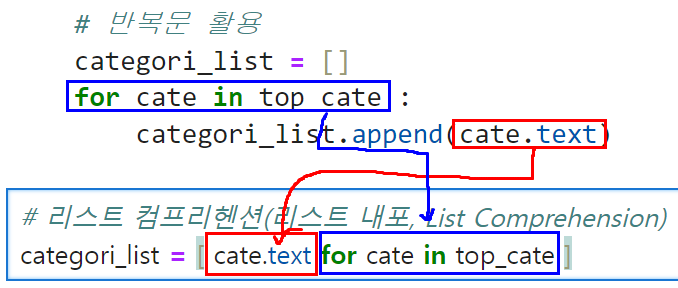